## Variables used in this problem 

`N` -> The number of partitions made on $[0, 1]$ and $[-1, 0]$

`n` -> The degree of the polynomial which is to be approximated

## Decision Variable
`a_i` -> coefficients of the approximation polynomial

## Penalty for the problem 
`L1` cost function (which is the sum of squares)
`L2` cost function (which is the sum of absolute values)

## Constraints
There are no constraints in this convex optimization problem 

## Convex Optimization Problem 

We have to minimize the cost functions for various values of `n` and for a large enough, fixed `N`

In [723]:
import cvxpy as cvpy
import numpy as npy 

N = 50

# different values of n 
n1 = 5
n2 = 10
n3 = 20

# Values of x-coordinates where it is partitioned

x_k = []
for i in range(-N, N+1):
  x_k.append(i/N)

# different cvxpy variables for different values of n 

a_1 = cvpy.Variable(n1)
a_2 = cvpy.Variable(n2)
a_3 = cvpy.Variable(n3)

# L1 Cost function

def L1_cost_function(a, n):
  c1_result = 0

  for i in range(-N, N+1):
    c1_sum = ((x_k[i+N])**n)

    for j in range(0,n-1):
      c1_sum = c1_sum - (a[j] * (x_k[i+N] ** j))

    c1_result += ((c1_sum)**2)

  return c1_result

# Objectives for different values of n 

L1_objective_1 = cvpy.Minimize(L1_cost_function(a_1, n1))
L1_objective_2 = cvpy.Minimize(L1_cost_function(a_2, n2))
L1_objective_3 = cvpy.Minimize(L1_cost_function(a_3, n3))

constraints = []

#Convex optimization problems for different values of n 

prob_1 = cvpy.Problem(L1_objective_1, constraints)
prob_2 = cvpy.Problem(L1_objective_2, constraints)
prob_3 = cvpy.Problem(L1_objective_3, constraints)

prob_1.solve()
prob_2.solve()
prob_3.solve()

# Printing coefficients of a for n = 5, 10, 15 with respect to cost function L1

print("The coefficients for the case n = 5 are : ", a_1.value)
print("The coefficients for the case n = 10 are : ", a_2.value)
print("The coefficients for the case n = 15 are : ", a_3.value)

The coefficients for the case n = 5 are :  [ 3.03572161e-19 -2.47390507e-01 -2.42640759e-17  1.13266667e+00
 -0.00000000e+00]
The coefficients for the case n = 10 are :  [ 1.48241840e-03 -3.32110031e-17 -8.02074989e-02  4.35379891e-16
  6.83740241e-01 -1.27769897e-15 -2.01733879e+00  9.49601569e-16
  2.40884211e+00 -0.00000000e+00]
The coefficients for the case n = 15 are :  [-1.89536695e-05  1.10326015e-12  1.97533232e-03 -1.30617212e-11
 -3.14469485e-02  4.84624681e-11  1.61611646e-01 -4.62557640e-10
 -2.32749760e-01  3.38909465e-09 -4.33600450e-01 -1.08345604e-08
  1.38686804e+00  1.67005386e-08 -1.63419883e-01 -1.23796343e-08
 -2.69401355e+00  3.55075399e-09  3.00476481e+00  0.00000000e+00]


## Functions and its approximations for L1 cost function







In [724]:

function_f_1 = []
function_f_2 = []
function_f_3 = []

L1_approximation_1 = []
L1_approximation_2 = []
L1_approximation_3 = []

# loop to calculate the value of f(x) at partitioned values and append them in a list

for i in range(-N, N+1):
  function_f_1.append(x_k[i+N] ** n1)
  function_f_2.append(x_k[i+N] ** n2)
  function_f_3.append(x_k[i+N] ** n3)


#loop to calculate the value of g(x) at partitioned values and append them in a list

for k in range(-N, N+1):

  temp1 = 0
  temp2 = 0
  temp3 = 0

  for j in range(0, n1 - 1):
    temp1 += ((a_1[j].value)*(x_k[k+N] ** j))
  for j in range(0, n2 - 1 ):
    temp2 += ((a_2[j].value)*(x_k[k+N] ** j))
  for j in range(0, n3 - 1):
    temp3 += ((a_3[j].value)*(x_k[k+N] ** j))

  L1_approximation_1.append(temp1)
  L1_approximation_2.append(temp2)
  L1_approximation_3.append(temp3)


## Plots for L1 cost function

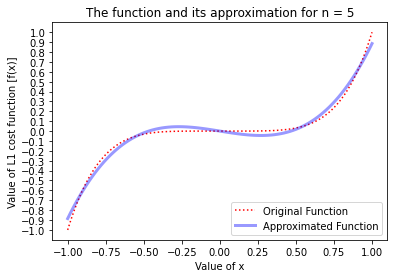

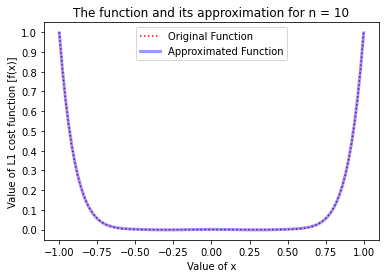

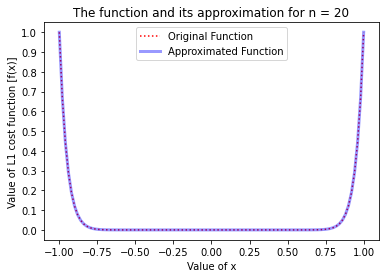

In [725]:

from matplotlib import pyplot as plt 

# plotting the function and its approximation for three n values

# Plot for n = 5

plt.plot(x_k, function_f_1, color = 'red', linestyle = ':' , mfc='white')
plt.plot(x_k, L1_approximation_1, color = 'blue', alpha = 0.4, linewidth = 3, mfc='white')
plt.legend(["Original Function", "Approximated Function"], loc="lower right")

plt.xticks(npy.arange(-1, 1.25, 0.25))
plt.yticks(npy.arange(-1, 1.1, 0.1))

plt.title('The function and its approximation for n = 5') 
plt.ylabel('Value of L1 cost function [f(x)]') 
plt.xlabel('Value of x')
plt.show()

# Plot for n = 10

plt.plot(x_k, function_f_2, color = 'red', linestyle = ':'  , mfc='white')
plt.plot(x_k, L1_approximation_2, color = 'blue', alpha = 0.4, linewidth = 3, mfc='white')
plt.legend(["Original Function", "Approximated Function"], loc="upper center")

plt.xticks(npy.arange(-1, 1.25, 0.25))
plt.yticks(npy.arange(0, 1.1, 0.1))

plt.title('The function and its approximation for n = 10') 
plt.ylabel('Value of L1 cost function [f(x)]') 
plt.xlabel('Value of x')
plt.show()

# Plot for n = 15

plt.plot(x_k, function_f_3, color = 'red', linestyle = ':'  , mfc='white')
plt.plot(x_k, L1_approximation_3, color = 'blue', alpha = 0.4, linewidth = 3, mfc='white')
plt.legend(["Original Function", "Approximated Function"], loc="upper center")

plt.xticks(npy.arange(-1, 1.25, 0.25))
plt.yticks(npy.arange(0, 1.1, 0.1))

plt.title('The function and its approximation for n = 20') 
plt.ylabel('Value of L1 cost function [f(x)]') 
plt.xlabel('Value of x')
plt.show()


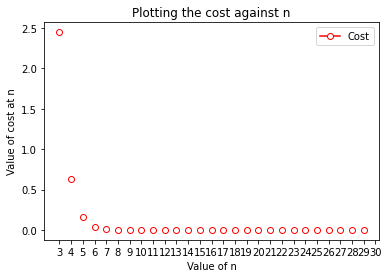

In [726]:
# Plotting Cost vs n for L1 function (squares)

for n in range(3, 30):
  a = cvpy.Variable(n)
  L1_objective = cvpy.Minimize(L1_cost_function(a, n))
  constraints = []
  prob = cvpy.Problem(L1_objective, constraints)
  prob.solve()
  plt.plot(n, L1_objective.value, color = "red", marker = 'o', mfc = 'white')
  plt.legend(["Cost"], loc="upper right")

plt.xticks(npy.arange(3, 31, 1))
plt.yticks(npy.arange(0, 3, 0.5))

plt.title('Plotting the cost against n') 
plt.ylabel('Value of cost at n') 
plt.xlabel('Value of n')
plt.show()

In [727]:
# L2 cost function

def L2_cost_function(a, n):

  c2_result = 0

  for i in range(-N, N+1):
    c2_sum = (x_k[i+N] ** n)

    for j in range(0, n-1):
      c2_sum = c2_sum - (a[j] * (x_k[i+N] ** j))
    
    c2_result += cvpy.abs(c2_sum)

  return c2_result

# different cvxpy variables for different values of n 

a_4 = cvpy.Variable(n1)
a_5 = cvpy.Variable(n2)
a_6 = cvpy.Variable(n3)

# objective functions for different values of n 

L2_objective_1 = cvpy.Minimize(L2_cost_function(a_4, n1))
L2_objective_2 = cvpy.Minimize(L2_cost_function(a_5, n2))
L2_objective_3 = cvpy.Minimize(L2_cost_function(a_6, n3))

# convex optimization problems for different values of n 

prob_4 = cvpy.Problem(L2_objective_1, constraints)
prob_5 = cvpy.Problem(L2_objective_2, constraints)
prob_6 = cvpy.Problem(L2_objective_3, constraints)

prob_4.solve()
prob_5.solve()
prob_6.solve()

# printing the values of coefficients for n = 5, 10, 15 with respect to cost function L2

print("The coefficients for the case n = 5 are : ", a_4.value)
print("The coefficients for the case n = 10 are : ", a_5.value)
print("The coefficients for the case n = 15 are : ", a_6.value)

The coefficients for the case n = 5 are :  [-9.06844202e-18 -1.93600000e-01  5.55383267e-17  1.02440000e+00
  0.00000000e+00]
The coefficients for the case n = 10 are :  [ 9.79362706e-04  1.30626363e-17 -6.02183974e-02 -1.31553147e-16
  5.56775893e-01  3.15590607e-16 -1.76685552e+00 -2.70208990e-16
  2.25880000e+00  0.00000000e+00]
The coefficients for the case n = 15 are :  [-1.06036498e-06 -5.37572141e-17  2.09805766e-04  3.26044507e-15
 -7.53753651e-03 -5.61733814e-14  1.05105006e-01  4.27506543e-13
 -7.38895325e-01 -1.70248296e-12  2.96234733e+00  3.79526341e-12
 -7.18525326e+00 -4.75325755e-12  1.07285164e+01  3.11835844e-12
 -9.63488314e+00 -8.32890876e-13  4.77039173e+00  0.00000000e+00]


In [728]:
function_g_1 = []
function_g_2 = []
function_g_3 = []

L2_approximation_1 = []
L2_approximation_2 = []
L2_approximation_3 = []

# loop to calculate the value of f(x) at partitioned values and append them in a list

for i in range(-N, N+1):
  function_g_1.append(x_k[i+N] ** n1)
  function_g_2.append(x_k[i+N] ** n2)
  function_g_3.append(x_k[i+N] ** n3)

# loop to calculate the value of g(x) at partitioned values and append them in a list

for k in range(-N, N+1):

  temp4 = 0
  temp5 = 0
  temp6 = 0

  for j1 in range(0, n1 - 1):
    temp4 += ((a_4[j1].value)*(x_k[k+N] ** j1))
  for j2 in range(0, n2 - 1 ):
    temp5 += ((a_5[j2].value)*(x_k[k+N] ** j2))
  for j3 in range(0, n3 - 1):
    temp6 += ((a_6[j3].value)*(x_k[k+N] ** j3))

  L2_approximation_1.append(temp4)
  L2_approximation_2.append(temp5)
  L2_approximation_3.append(temp6)

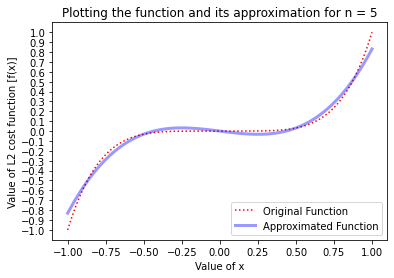

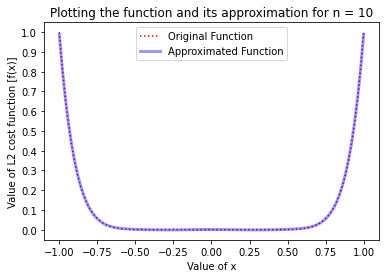

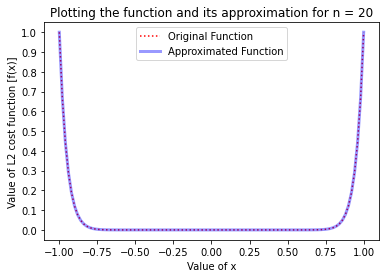

In [729]:
# plotting the function and its approximation for three n values

# Plot for n = 5

plt.plot(x_k, function_g_1, color = 'red', linestyle = ':'  , mfc='white')
plt.plot(x_k, L2_approximation_1, color = 'blue', alpha = 0.4, linewidth = 3, mfc='white')
plt.legend(["Original Function", "Approximated Function"], loc="lower right")


plt.xticks(npy.arange(-1, 1.25, 0.25))
plt.yticks(npy.arange(-1, 1.1, 0.1))

plt.title('Plotting the function and its approximation for n = 5') 
plt.ylabel('Value of L2 cost function [f(x)]') 
plt.xlabel('Value of x')
plt.show()

# Plot for n = 10

plt.plot(x_k, function_g_2, color = 'red', linestyle = ':'  , mfc='white')
plt.plot(x_k, L2_approximation_2, color = 'blue', alpha = 0.4, linewidth = 3, mfc='white')
plt.legend(["Original Function", "Approximated Function"], loc="upper center")

plt.xticks(npy.arange(-1, 1.25, 0.25))
plt.yticks(npy.arange(0, 1.1, 0.1))

plt.title('Plotting the function and its approximation for n = 10') 
plt.ylabel('Value of L2 cost function [f(x)]') 
plt.xlabel('Value of x')
plt.show()

# Plot for n = 15

plt.plot(x_k, function_g_3, color = 'red', linestyle = ':'  , mfc='white')
plt.plot(x_k, L2_approximation_3, color = 'blue', alpha = 0.4, linewidth = 3, mfc='white')
plt.legend(["Original Function", "Approximated Function"], loc="upper center")

plt.xticks(npy.arange(-1, 1.25, 0.25))
plt.yticks(npy.arange(0, 1.1, 0.1))

plt.title('Plotting the function and its approximation for n = 20') 
plt.ylabel('Value of L2 cost function [f(x)]') 
plt.xlabel('Value of x')
plt.show()

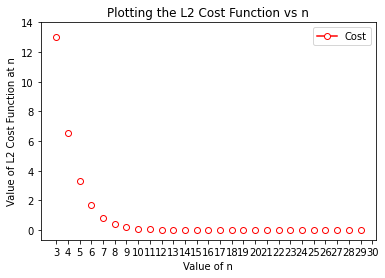

In [730]:
# Plotting Cost vs n for L2 Cost Function (absolute value)

for n in range(3, 30):
  a = cvpy.Variable(n)
  L2_objective = cvpy.Minimize(obj2(a, n))
  constraints = []
  problem_2 = cvpy.Problem(L2_objective, constraints)
  problem_2.solve()
  plt.plot(n, L2_objective.value, color = "red", marker = 'o', mfc = 'white')
  plt.legend(["Cost"], loc="upper right")

plt.xticks(npy.arange(3, 31, 1))
plt.yticks(npy.arange(0, 16, 2))

plt.title('Plotting the L2 Cost Function vs n') 
plt.ylabel('Value of L2 Cost Function at n') 
plt.xlabel('Value of n')
plt.show()

Link to Google Colab

https://colab.research.google.com/drive/1rbrZux3690gMYrxqp_6XtY6Tol68J-i7?usp=sharing